# Import Necesary Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Data Loading and Exploration

In [3]:
df= pd.read_csv("StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
450,female,group C,some college,free/reduced,completed,64,85,85
363,female,group D,some high school,free/reduced,none,27,34,32
236,male,group D,bachelor's degree,free/reduced,none,63,66,67
838,male,group B,associate's degree,free/reduced,completed,58,57,53
111,male,group C,high school,standard,none,62,55,49


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

##### Numerical data: math score, reading score and writing score
##### Categorical data: gender, race/ethnicity, parental level of education, lunch, test preparation course 

In [5]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Observations
1. All columns in this dataset are necessary for this analysis.
2. No missing values in any of the columns.
3. The deviation between the three numerical data is very close 
   so the distribution of score in the three columns are almost 
   alike especially in math score and writing score.
4. The minimum score are 0, 17 and 10 for math score, reading 
   score and writing score.
5. Only less than 25% of the class would have failed the tests 
   woefully.
6. About 50% of the class got nothing less than an average score .
7. Certainly 75% of the class scored above 70 in three tests .
8. The maximum score are 100 for the three tests. math score, reading 
   score and writing score.

### create overall score

In [6]:
df['overall score']= df['math score'] + df['writing score'] + df['reading score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


# Data Visualization and interpretation

### We'd be looking at the effect of the other features on the math score, reading score, writing score and overall score

In [8]:
melted_df= pd.melt(df,
                   id_vars=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'],
                  var_name='score')
melted_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,value
0,female,group B,bachelor's degree,standard,none,math score,72
1,female,group C,some college,standard,completed,math score,69
2,female,group B,master's degree,standard,none,math score,90
3,male,group A,associate's degree,free/reduced,none,math score,47
4,male,group C,some college,standard,none,math score,76


In [9]:
colors = ['#F08030','#6890F0', '#A040A0', '#E0C068','#EE99AC', '#7038F8', '#705898','#98D8D8']

### Effect of Gender on the math score, reading score, writing score and overall score

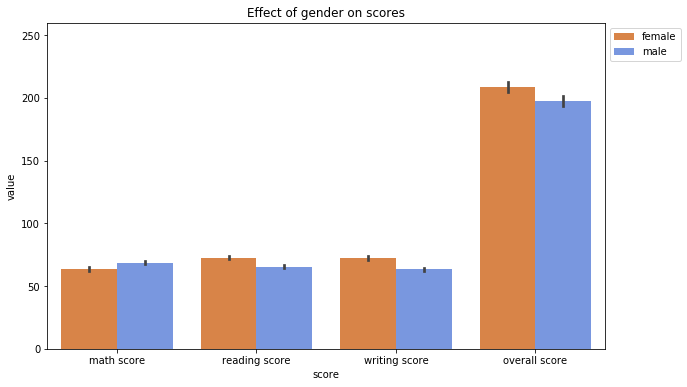

In [10]:
plt.figure(figsize=(10,6)) 

sns.barplot(x='score',               
              y='value',               
              data=melted_df,               
              hue='gender',               
              dodge=True,               
              palette=colors)  

plt.ylim(0, 260) 
plt.title('Effect of gender on scores')

### Interpretation 1
The effect of gender on the students score is not that significant, 
but the females have more score in the three tests and overall.

### Effect of race/ethnicity on the math score, reading score, writing score and overall score

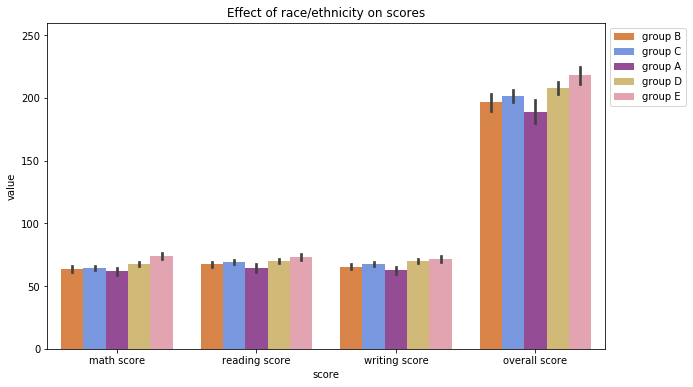

In [11]:
plt.figure(figsize=(10,6)) 

sns.barplot(x='score',               
              y='value',               
              data=melted_df,               
              hue='race/ethnicity',               
              dodge=True,               
              palette=colors)  

plt.ylim(0, 260) 
plt.title('Effect of race/ethnicity on scores')

### Interpretation 2
The effect of race/ethnicity on the students score can be depicted
as follow; 

    group E > group D > group C > group B > group A
Meaning that group E race/ethnicity has the highest score in three 
tests and overall followed by group D, and so on.

### Effect of parental level of education on the math score, reading score, writing score and overall score

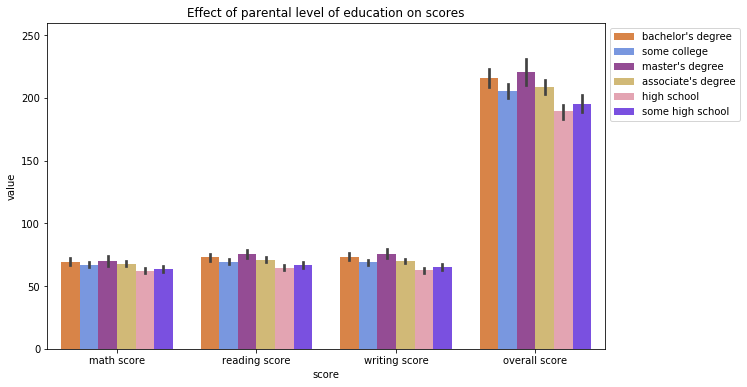

In [12]:
plt.figure(figsize=(10,6)) 

sns.barplot(x='score',               
              y='value',               
              data=melted_df,               
              hue='parental level of education',               
              dodge=True,               
              palette=colors)  

plt.ylim(0, 260) 
plt.title('Effect of parental level of education on scores')

### Interpretation 3
The effect of parental level of education on the students score can 
be depicted as follow; 

    master's > bachelor's > associate > some college > high school
Meaning that master's degree level education has the highest score
in three tests and overall followed by group D, and so on.


### Effect of lunch on the math score, reading score, writing score and overall score

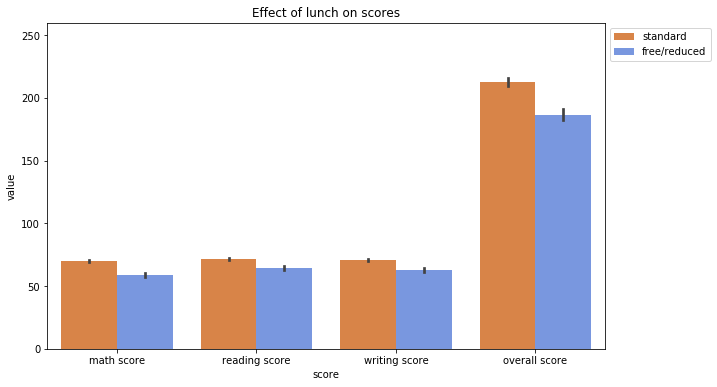

In [13]:
plt.figure(figsize=(10,6)) 

sns.barplot(x='score',               
              y='value',               
              data=melted_df,               
              hue='lunch',               
              dodge=True,               
              palette=colors)  

plt.ylim(0, 260) 
plt.title('Effect of lunch on scores')

### Interpretation 4

The students which had standard lunch have higher scores in all subjects and also overall
than students which had free/reduced lunch

### Effect of test preparation course on the math score, reading score, writing score and overall score

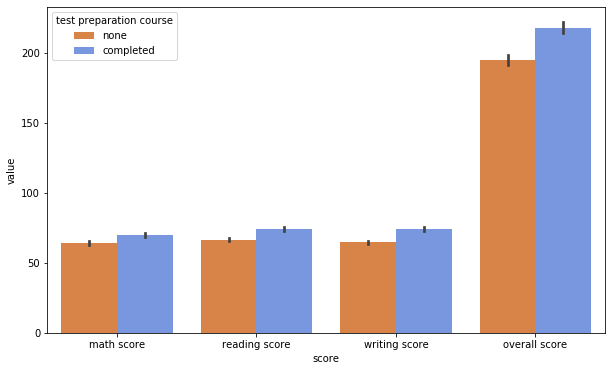

In [14]:
plt.figure(figsize=(10,6)) 

sns.barplot(x='score',               
              y='value',               
              data=melted_df,               
              hue='test preparation course',               
              dodge=True,               
              palette=colors)  

### Interpretation 5



students which took the test preparation course genarally got higher score in all subjects and overall
and vice versa.